<a href="https://colab.research.google.com/github/NancyYiWang/WildFireSmokePrediction/blob/main/DataClimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------

Download data from<br>
https://drive.google.com/drive/folders/1IvBmSOVATtls8k3rzlXT3EJZ_MZ4BWmS?usp=drive_link <br>
and store the data in your drive.

--------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install netCDF4

import os
from netCDF4 import Dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.7 MB/s eta 0:00:00


In [4]:
nc_directory = "/content/drive/My Drive/WildFire/DATA/NOAA_Climate" # Change the folder accordingly if needed.

def list_files(directory):
    files = [f for f in os.listdir(directory) if f.endswith('.nc')]
    print("Available files:")
    for idx, file in enumerate(files):
        print(f"{idx + 1}. {file}")
    return files

def display_file_info(nc_file_path):
    try:
        with Dataset(nc_file_path, 'r') as nc_data:
            print("\n--- Metadata ---")
            print(nc_data)

            print("\n--- Variables ---")
            for var_name, variable in nc_data.variables.items():
                print(f"Variable: {var_name}")
                print(f"  Dimensions: {variable.dimensions}")
                print(f"  Shape: {variable.shape}")
                print(f"  Attributes: {variable.ncattrs()}")

            # To align the data with GOES observations, we examine the "time" variable.
            # Let's start by displaying the first 10 entries of the "time" variable to understand its structure.
            print("\n--- Time Variable ---")
            if "time" in nc_data.variables:
                time_variable = nc_data.variables["time"][:10]
                print("First 10 entries of the 'time' variable:")
                print(time_variable)

                print("Attributes of the 'time' variable:")
                time_variable = nc_data.variables["time"]
                for attr in time_variable.ncattrs():
                    print(f"{attr}: {getattr(time_variable, attr)}")
            else:
                print("'time' variable not found in the dataset.")
    except Exception as e:
        print(f"Error reading file: {e}")

files = list_files(nc_directory)
file_choice = input("\nEnter the number corresponding to the file you want to view: ")

try:
    file_choice = int(file_choice) - 1
    if 0 <= file_choice < len(files):
        chosen_file = os.path.join(nc_directory, files[file_choice])
        display_file_info(chosen_file)

    else:
        print("Invalid choice. Please select a valid file number.")

except ValueError:
    print("Invalid input. Please enter a number corresponding to the file.")

Available files:
1. vwnd.2024.nc
2. air.2024.nc
3. hgt.2024.nc
4. omega.2024.nc
5. rhum.2024.nc
6. uwnd.2024.nc

Enter the number corresponding to the file you want to view: 1

--- Metadata ---
<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    title: 4x Daily NCEP/DOE Reanalysis 2
    comments: Data is from 
NCEP/DOE AMIP-II Reanalysis (Reanalysis-2)
(4x/day).  It consists of most variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    source: NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution: National Centers for Environmental Prediction
    dataset_title: NCEP-DOE AMIP-II Reanalysis
    References: https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html
    source_url: http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history: created 2021/02 by NOAA/ESRL/PSD
Converted to chunked, deflated non-packed NetCDF4 2020/05
    dimensions(sizes): level(1

In [5]:
# The Time Period Calculation Tool
# Calculate the start and end time variable values for certain time peroid.

from datetime import datetime

REFERENCE_TIME = datetime(1800, 1, 1, 0, 0, 0)

def calculate_time_value(year, month, day, hour):
    try:
        user_time = datetime(year, month, day, hour, 0, 0)

        time_difference = (user_time - REFERENCE_TIME).total_seconds() / 3600
        return time_difference
    except Exception as e:
        print(f"Error calculating time value: {e}")
        return None

def get_user_time(prompt):
    print(prompt)
    try:
        year = int(input("Enter year (e.g., 2024): "))
        month = int(input("Enter month (1-12): "))
        day = int(input("Enter day (1-31): "))
        hour = int(input("Enter hour (0-23): "))
        return calculate_time_value(year, month, day, hour)
    except ValueError:
        print("Invalid input. Please enter integers for year, month, day, and hour.")
        return None

start_time_value = get_user_time("Enter the start time:")
end_time_value = get_user_time("Enter the end time:")

if start_time_value is not None and end_time_value is not None:
    print(f"Start time value: {start_time_value} hours since {REFERENCE_TIME}")
    print(f"End time value: {end_time_value} hours since {REFERENCE_TIME}")

Enter the start time:
Enter year (e.g., 2024): 2024
Enter month (1-12): 6
Enter day (1-31): 1
Enter hour (0-23): 0
Enter the end time:
Enter year (e.g., 2024): 2024
Enter month (1-12): 6
Enter day (1-31): 1
Enter hour (0-23): 23
Start time value: 1967184.0 hours since 1800-01-01 00:00:00
End time value: 1967207.0 hours since 1800-01-01 00:00:00


Available files:
1. vwnd.2024.nc
2. air.2024.nc
3. hgt.2024.nc
4. omega.2024.nc
5. rhum.2024.nc
6. uwnd.2024.nc

Enter the number corresponding to the file you want to view: 1
Enter the time to view:
Enter year (e.g., 2024): 2024
Enter month (1-12): 6
Enter day (1-31): 1
Enter hour (0-23): 0
Key Variable Plot on Time Value 1967184.0


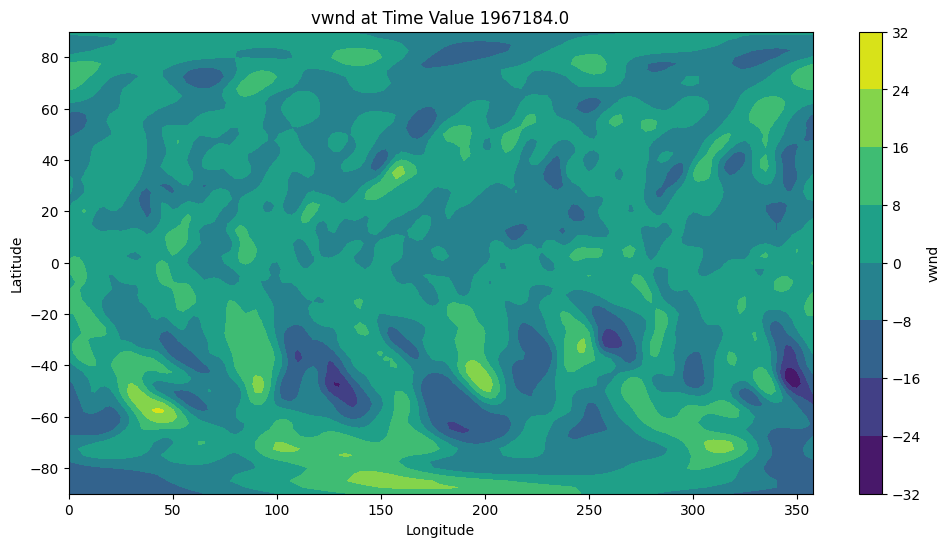

In [6]:
# The Plot Tool
# Plot data for a specific time point based on one of the five files.
# First choose file. Then input the time variable value.

import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Extract key variable name from file name
def extract_key_variable_name(file_name):
    return file_name.split(".")[0]

def calculate_nearest_time_index(time_var, time_value):
    differences = np.abs(time_var - time_value)
    return np.argmin(differences)

def plot_variable(nc_file_path, variable_name, time_value):
    with Dataset(nc_file_path, 'r') as nc_data:
        if variable_name not in nc_data.variables:
            print(f"Variable '{variable_name}' not found in the file.")
            return

        time_var = nc_data.variables['time'][:]
        time_index = calculate_nearest_time_index(time_var, time_value)

        variable = nc_data.variables[variable_name]
        data = variable[time_index, :, :, :]

        lat = nc_data.variables[variable.dimensions[-2]][:]
        lon = nc_data.variables[variable.dimensions[-1]][:]

        plt.figure(figsize=(12, 6))
        plt.contourf(lon, lat, data[0, :, :], cmap='viridis')
        plt.colorbar(label=variable_name)
        plt.title(f"{variable_name} at Time Value {time_value}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

files = list_files(nc_directory)
file_choice = input("\nEnter the number corresponding to the file you want to view: ")

try:
    file_choice = int(file_choice) - 1
    if 0 <= file_choice < len(files):
        chosen_file = os.path.join(nc_directory, files[file_choice])
        key_variable_name = extract_key_variable_name(files[file_choice])

        time_value = get_user_time("Enter the time to view:")

        if time_value is not None:
            print(f"Key Variable Plot on Time Value {time_value}")
            plot_variable(chosen_file, key_variable_name, time_value)
    else:
        print("Invalid choice. Please select a valid file number.")
except ValueError:
    print("Invalid input. Please enter a number corresponding to the file.")